# Getting gene lenghts from GTF/GFF file.

Made by: Cynthia Soto <br>
Date: March 12nd 2021 <br>
Last md: March 17th <br>

**Assumptions:**<br>
You have a GTF file to extract the get lengths (GTF or GFF file)  <br>

In [27]:
# Libraries required
import os 
#import glob
import pandas as pd

In [28]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data


**Araport11_GFF3_genes_transposons.201606.gtf** es la ultima anotación liberada para el genoma **TAIR10** en Julio del 2016. En esta anotación se añadio información para 253 genes codificantes, informacion de mRNAs y lncRNAs, entre otras caracteristicas genómicas <br>
La estimación de los valores de expresión fue realizada con **HTSeq** por lo que se utilizó una versión simplificada del archivo **gtf** llamada **gff** para cumplir con los requisitos de la herramienta de cuantificación (descargada de phytozone)<br> 
Para normalizar los datos y hacerlos comparables entre sí aplicaré la **normalización TPM**. La cual se calcula como sigue:
![TPM](figuras_notebook/TPM.gif)

Para aplicar esta normalización se requiere la **longitud del gen**, por lo que voy a filtrar las columnas 3,4,5 y 8 para extraer esta información, donde la longitud estará definida por la diferencia entre las columnas 4 y 5. <br>
Nota que esto dará lugar a una generalización sobre las longitudes de los genes que no es necesariamente precisa, pero que sirve para hacer un primer análisis exploratorio de los datos. Existen otras formas de alcanzar este meta y todos los métodos existentes hoy en día presentan pros y contras:
https://www.biostars.org/p/91218/#91233; https://www.biostars.org/p/112735/; https://www.biostars.org/p/294545/#294591 <br>
![gene_annot_example](figuras_notebook/gene_annot_file.png)

In [47]:
df=pd.read_csv("Araport11_GFF3_genes_transposons.201606.gtf", header=None, usecols=[2,3,4,8], sep='\t')    ## ,nrows=100  usecols=[1,3] / Araport11_GFF3.gff
df
## el valor de la columna 2 contiene las caracteristicas (feature) genómicas. 
## el valor "CDS" contiene la longitud máxima del gen, que deberá ser calculada con: columna 4 - columna 3

,2,3,4,8
0,transcript,3631,5899,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
1,exon,3631,3913,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
2,exon,3996,4276,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
3,exon,4486,4605,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
4,exon,4706,5095,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
...,...,...,...,...
668992,exon,363725,364042,"transcript_id ""ATMG01400.1""; gene_id ""ATMG01400"";"
668993,CDS,363725,364042,"transcript_id ""ATMG01400.1""; gene_id ""ATMG01400"";"
668994,transcript,366086,366700,"transcript_id ""ATMG01410.1""; gene_id ""ATMG01410"";"
668995,exon,366086,366700,"transcript_id ""ATMG01410.1""; gene_id ""ATMG01410"";"


In [48]:
## filtering by column 2 which contains the available features
f_genes = df[2]=='CDS' # 
df1 = df[f_genes]

In [49]:
print(df1.shape)
df1.head(7)

(286355, 4)


,2,3,4,8
7,CDS,3760,3913,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
8,CDS,3996,4276,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
9,CDS,4486,4605,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
10,CDS,4706,5095,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
11,CDS,5174,5326,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
12,CDS,5439,5630,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
22,CDS,7315,7450,"transcript_id ""AT1G01020.2""; gene_id ""AT1G01020"";"


In [50]:
df1.columns = ['Feature','Start','End','Description']
df1.head(5)

,Feature,Start,End,Description
7,CDS,3760,3913,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
8,CDS,3996,4276,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
9,CDS,4486,4605,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
10,CDS,4706,5095,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"
11,CDS,5174,5326,"transcript_id ""AT1G01010.1""; gene_id ""AT1G01010"";"


In [51]:
## split the 'Description' field to get the gene_id alone
df_gene = df1["Description"].str.split(' gene_id "', n = 1, expand = True) #,  expand = True
df_gene.head(3)

,0,1
7,"transcript_id ""AT1G01010.1"";","AT1G01010"";"
8,"transcript_id ""AT1G01010.1"";","AT1G01010"";"
9,"transcript_id ""AT1G01010.1"";","AT1G01010"";"


In [52]:
# making separate first name column from new data frame 
df1["Name_gene"] = df_gene[1]
df1.drop(columns = ['Description'], inplace = True) 
df1.head(3)

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Feature,Start,End,Name_gene
7,CDS,3760,3913,"AT1G01010"";"
8,CDS,3996,4276,"AT1G01010"";"
9,CDS,4486,4605,"AT1G01010"";"


In [53]:
df_gene = df1["Name_gene"].str.split('"', n = 1, expand = True) 
df_gene.head(5)

,0,1
7,AT1G01010,;
8,AT1G01010,;
9,AT1G01010,;
10,AT1G01010,;
11,AT1G01010,;


In [54]:
df1['Genes']=df_gene[0]
df1.drop(columns = ['Name_gene'], inplace = True) 
df1.head(5)

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Feature,Start,End,Genes
7,CDS,3760,3913,AT1G01010
8,CDS,3996,4276,AT1G01010
9,CDS,4486,4605,AT1G01010
10,CDS,4706,5095,AT1G01010
11,CDS,5174,5326,AT1G01010


### Jump to the aggregation functions to do it faster
Or do it by step by step

In [55]:
#df_gene_len = df1.groupby(['Genes','Feature','Start','End'])["ID"].count()
#df_gene_len.head(20)

In [56]:
## grouping by ID to know the distributions based on the length
s_by_gene = df1.groupby("Genes")["Genes"].count()
s_by_gene.head(10)

Genes
AT1G01010     6
AT1G01020    42
AT1G01030     3
AT1G01040    40
AT1G01050    16
AT1G01060    56
AT1G01070    11
AT1G01080    11
AT1G01090     3
AT1G01100    13
Name: Genes, dtype: int64

In [57]:
## checking if number of features is correct
#print(s_by_gene.dtypes)
len(s_by_gene)

27655

In [58]:
## a taste of information about data
s_by_gene.sort_values(inplace=True)
print(s_by_gene.head(10))
print(s_by_gene.tail(10))

Genes
ATMG01410    1
AT2G16570    1
AT5G07545    1
AT2G16500    1
AT2G16450    1
AT5G07572    1
AT5G07580    1
AT5G07610    1
AT2G16280    1
AT2G16220    1
Name: Genes, dtype: int64
Genes
AT5G27970    222
AT3G57410    224
AT3G08840    234
AT1G20060    235
AT5G24740    271
AT4G15215    273
AT5G06120    283
AT1G24706    288
AT2G33240    324
AT1G48090    381
Name: Genes, dtype: int64


In [59]:
print(s_by_gene.max())
print(s_by_gene.min())

381
1


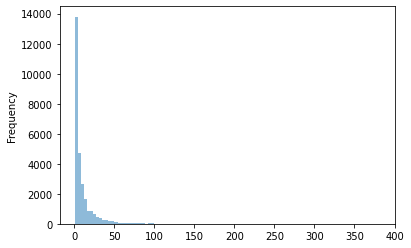

In [60]:
#ax = s_by_gene.plot.kde(bw_method=1)   #bw_method=0.5
#ax = s_by_gene.plot.box()
ax = s_by_gene.plot.hist(bins=100, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

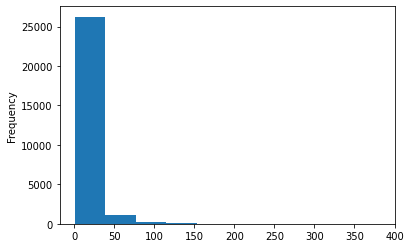

In [61]:
s_by_gene.plot.hist()

### aggregation functions
Calculating the gene length

In [62]:
s_by_gene_min = df1.groupby("Genes").agg({'Start': ['min']})
s_by_gene_max = df1.groupby("Genes").agg({'End': ['max']})
s_by_gene_max.head(5)

,End
,max
Genes,
AT1G01010,5630
AT1G01020,8666
AT1G01030,12940
AT1G01040,31079
AT1G01050,32670


### The custom functions to calculate the gen length

In [64]:
##  This function calculated the gene length from a file previously filtered by genomic feature. 
##  custom function that returns a Series of all the aggregations. 
##  Use the Series index as labels for the new columns
##        @x parameter is a dataframe containing the feature's lengths
##  Return:
##        @pd.series is a df with the calculated values into new columns

def f(x):
    d = {}
    d['min'] = x['Start'].min()            #get the minimun value from each subgrouped set 
    d['max'] = x['End'].max()              #get the maximun value from each subgrouped set 
    d['gen_len'] = (d['max'] - d['min']) + 1      # difference btw data series 
    return pd.Series(d, index=['min', 'max', 'gen_len'])   #index as new column in the df

In [65]:
## call the agg function
df_gene_len = df1.groupby("Genes").apply(f)

In [66]:
df_gene_len.head(5)

,min,max,gen_len
Genes,,,
AT1G01010,3760,5630,1871
AT1G01020,6915,8666,1752
AT1G01030,11864,12940,1077
AT1G01040,23519,31079,7561
AT1G01050,31382,32670,1289


In [67]:
df_gene_len.reset_index()

,Genes,min,max,gen_len
0,AT1G01010,3760,5630,1871
1,AT1G01020,6915,8666,1752
2,AT1G01030,11864,12940,1077
3,AT1G01040,23519,31079,7561
4,AT1G01050,31382,32670,1289
...,...,...,...,...
27650,ATMG01350,346757,347194,438
27651,ATMG01360,349830,351413,1584
27652,ATMG01370,360717,361052,336
27653,ATMG01400,363725,364042,318


In [68]:
len(df_gene_len)

27655

In [69]:
df_gene_len.to_csv('Araport11_GFF3_genes_lenghts.csv', sep='\t', index=True)

In [ ]:
## Second and third options with agg functions
## Aggregatin multiple functions to grouping by df

grouped_genes = df1.groupby('ID').agg({'Start':'min', 
                                       'End':'max',
                                       'len': lambda x: x.max() - x.min()})   
## declaring with a function
def max_min(x):
    return x.max() - x.min()
max_min.__name__ = 'Max minus Min'

grouped_genes = df1.groupby('ID').agg({'Start':'min', 
                                       'End':'max',
                                       'len': max_min})                   
## Need to be fixed 